In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
fb = pd.read_csv('FB.csv')
# ms = pd.DataFrame.from_csv('../data/microsoft.csv')

In [6]:
fb.columns

Index(['Date', 'ID', 'Close', 'Low', 'High', 'Volume', 'C(t-5)', 'C(t-4)',
       'C(t-3)', 'C(t-2)', 'C(t-4)>C(t-5)', 'C(t-3)>C(t-4)', 'C(t-2)>C(t-3)',
       'C(t-1)>C(t-2)', 'MA-10', 'MA-5', 'WMA-10', 'SO', 'M', 'SSO', 'EMA',
       'MACD_Sline_9', 'RSI', 'CCI', 'ADO', 'MA-10>C', 'MA-5>C', 'WMA-10>C',
       'SO>SOt-1', 'M>0', 'SSO>SSOt-1', 'EMA>C', 'MACD t-1 > MACD t-2',
       'RSI70-30', 'CCI200-200', 'ADO>ADOt-1', 'HIS', 'DAX', 'AORD', 'N100',
       'N225', 'SP500', 'SSE', 'Closing_Direction'],
      dtype='object')

In [10]:
columns=['C(t-3)', 'C(t-2)', 'C(t-4)>C(t-5)', 'C(t-3)>C(t-4)', 'C(t-2)>C(t-3)',
       'C(t-1)>C(t-2)', 'MA-10', 'MA-5', 'WMA-10', 'SO', 'M', 'SSO', 'EMA',
       'MACD_Sline_9', 'RSI', 'CCI', 'ADO', 'MA-10>C', 'MA-5>C', 'WMA-10>C',
       'SO>SOt-1', 'M>0', 'SSO>SSOt-1', 'EMA>C', 'MACD t-1 > MACD t-2',
       'RSI70-30', 'CCI200-200', 'ADO>ADOt-1', 'HIS', 'DAX', 'AORD', 'N100',
       'N225', 'SP500', 'SSE', 'Closing_Direction']

In [13]:
fb=fb.drop(columns,axis=1)

In [14]:
fb.columns

Index(['Date', 'ID', 'Close', 'Low', 'High', 'Volume', 'C(t-5)', 'C(t-4)'], dtype='object')

In [17]:
fb=fb.drop( ['C(t-5)', 'C(t-4)'],axis=1)

In [18]:
fb

,Date,ID,Close,Low,High,Volume
0,2012-07-09,41099,31.730000,31.260000,31.900000,10945600
1,2012-07-10,41100,32.169998,31.990000,32.880001,17785200
2,2012-07-11,41101,31.469999,31.160000,32.480000,14269500
3,2012-07-12,41102,30.969999,30.549999,31.559999,13030300
4,2012-07-13,41103,30.809999,30.600000,31.400000,11300700
...,...,...,...,...,...,...
1603,2018-11-21,43425,132.429993,126.849998,134.160004,41939500
1604,2018-11-23,43427,134.820007,134.130005,137.190002,25469700
1605,2018-11-26,43430,131.729996,131.259995,134.500000,11886100
1606,2018-11-27,43431,136.380005,132.779999,137.000000,24263600


## Create a new column in the DataFrame (1) - Price difference

In [59]:
#Create a new column PriceDiff in the DataFrame fb
fb['PriceDiff'] = fb['Close'].shift(-1) - fb['Close']
fb['Close1']=fb['Close'].shift(-1)


In [22]:
#Run this code to display the price difference of Microsoft on 2015-01-05
print(fb['PriceDiff'])

0       0.439998
1      -0.699999
2      -0.500000
3      -0.160000
4      -0.090000
          ...   
1603    2.390014
1604   -3.090011
1605    4.650009
1606   -1.380005
1607         NaN
Name: PriceDiff, Length: 1608, dtype: float64


## Create a new column in the DataFrame (2) - Daily return

Daily Return is calcuated as PriceDiff/Close

In [23]:
#Create a new column Return in the DataFrame fb
fb['Return'] = fb['PriceDiff'] /fb['Close']


In [25]:
#Run this code to print the return on 2015-01-05
print(fb['Return'])

0       0.013867
1      -0.021759
2      -0.015888
3      -0.005166
4      -0.002921
          ...   
1603    0.018047
1604   -0.022920
1605    0.035300
1606   -0.010119
1607         NaN
Name: Return, Length: 1608, dtype: float64


## Create a new column in the DataFrame using List Comprehension - Direction

In [45]:
fb.head(10)

,Date,ID,Close,Low,High,Volume,PriceDiff,Return,Direction,ma50,ma10
0,2012-07-09,41099,31.730000,31.260000,31.900000,10945600,0.439998,0.013867,1,NaN,NaN
1,2012-07-10,41100,32.169998,31.990000,32.880001,17785200,-0.699999,-0.021759,0,NaN,NaN
2,2012-07-11,41101,31.469999,31.160000,32.480000,14269500,-0.500000,-0.015888,0,NaN,NaN
3,2012-07-12,41102,30.969999,30.549999,31.559999,13030300,-0.160000,-0.005166,0,NaN,NaN
4,2012-07-13,41103,30.809999,30.600000,31.400000,11300700,-0.090000,-0.002921,0,NaN,NaN
5,2012-07-16,41106,30.719999,30.559999,31.070000,8108300,-2.469999,-0.080404,0,NaN,NaN
6,2012-07-17,41107,28.250000,28.209999,30.500000,24672100,-0.160000,-0.005664,0,NaN,NaN
7,2012-07-18,41108,28.090000,27.150000,28.590000,30438600,1.020001,0.036312,1,NaN,NaN
8,2012-07-19,41109,29.110001,28.150000,29.290001,16841800,-0.110001,-0.003779,0,NaN,NaN
9,2012-07-20,41110,29.000000,28.629999,29.500000,13685100,-0.240000,-0.008276,0,30.232,30.232


In [31]:
#Create a new column Direction. 
#The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
#for every record in the DataFrame - fb

fb['Direction'] = [1 if fb['PriceDiff'].loc[ei] > 0 else 0 for ei in fb.index ]

** Expected Output: ** Price difference on 2015-01-05 is -0.6799999999999997. direction is 0

## Create a new column in the DataFrame using Rolling Window calculation (.rolling()) - Moving average

In [48]:
fb['ma10'] = fb['Close'].rolling(10).mean()#fast signal
fb['ma50'] = fb['Close'].rolling(50).mean()#slow

# ex=fb['Close'][:10]
# ex.describe()




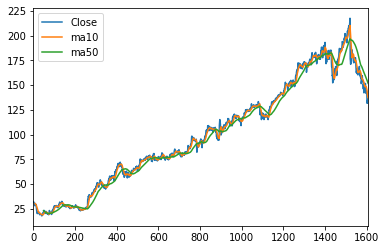

In [52]:
fb['Close'].plot(legend=True)
fb['ma10'].plot(legend=True)
fb['ma50'].plot(legend=True)
# if ma10>ma50 then buy and share the stock

In [55]:
fb['Shares']=[1 if fb.loc[ei,'ma10']>fb.loc[ei,'ma50'] else 0 for ei in fb.index]

In [63]:
fb['Profit']=[fb.loc[el,'PriceDiff'] if fb.loc[el,'Shares']==1 else 0 for el in fb.index ]

In [69]:
fb.tail()

,Date,ID,Close,Low,High,Volume,PriceDiff,Return,Direction,ma50,ma10,Shares,Close1,Profit,wealth
1603,2018-11-21,43425,132.429993,126.849998,134.160004,41939500,2.390014,0.018047,1,153.9166,141.965001,0,134.820007,0.0,70.710007
1604,2018-11-23,43427,134.820007,134.130005,137.190002,25469700,-3.090011,-0.022920,0,153.3730,140.294002,0,131.729996,0.0,70.710007
1605,2018-11-26,43430,131.729996,131.259995,134.500000,11886100,4.650009,0.035300,1,152.7804,138.680002,0,136.380005,0.0,70.710007
1606,2018-11-27,43431,136.380005,132.779999,137.000000,24263600,-1.380005,-0.010119,0,152.2616,137.822002,0,135.000000,0.0,70.710007
1607,2018-11-28,43432,135.000000,133.710007,136.610001,20750300,NaN,NaN,0,151.7500,137.167001,0,NaN,0.0,70.710007


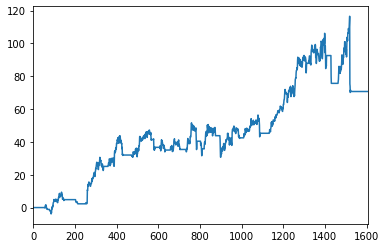

In [70]:
fb['wealth'].plot()

In [65]:
fb['wealth']=fb['Profit'].cumsum()
# its give the make money or loss money

TypeError: no numeric data to plot

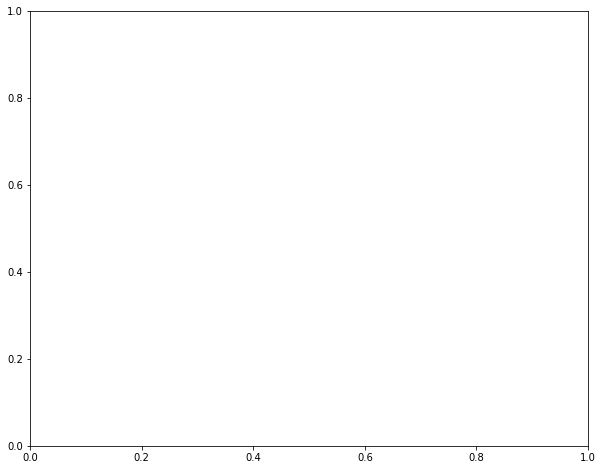

In [62]:
#plot the moving average
plt.figure(figsize=(10, 8))
fb['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
fb['Close'].loc['2012-07-09':'2012-07-27'].plot(label='Close')
plt.legend()
plt.show()

In [ ]:
# You can use .rolling() to calculate any numbers of days' Moving Average. This is your turn to calculate "60 days"
# moving average of Microsoft, rename it as "ma60". And follow the codes above in plotting a graph

ms['ma60'] = None

#plot the moving average
plt.figure(figsize=(10, 8))
ms['ma60'].loc['2015-01-01':'2015-12-31'].plot(label='MA60')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

** Expected Output: **

<img src="MA.png">